# Spesifikasi

- V<sub>in</sub> = 48V
- V<sub>out</sub> = 12V
- P<sub>o</sub> = 100W
- &#916;V<sub>o</sub> &#8804; 1%
- &#916;I<sub>L</sub> &#8804; 10%
- f<sub>sw</sub> = 20e3
- Mosfet: IRFB4310PbF, Infineon

# Plecs

In [6]:
import xmlrpc.client as xml
import os
import matplotlib.pyplot as plt
import numpy as np

In [21]:
model = 'buck_1'
file_type = '.plecs'
V_in = 48
V_out = 12

In [8]:
plecs = xml.Server("http://localhost:1080/RPC2").plecs

In [22]:
plecs.load(r"E:\OneDrive - UGM 365\Mata Kuliah\Skripsi\Plecs\Python\buck\buck_1.plecs")


0

In [23]:
plecs.get(model+'/L1')

[['Name', 'L1'],
 ['Type', 'Inductor'],
 ['CommentStatus', 'Active'],
 ['L', '0.0007'],
 ['i_init', '0']]

In [24]:
plecs.get(model+'/C')

[['Name', 'C'],
 ['Type', 'Capacitor'],
 ['CommentStatus', 'Active'],
 ['C', '6e-05'],
 ['v_init', '0']]

In [25]:
plecs.get(model+'/Symmetrical PWM1')

[['Name', 'Symmetrical PWM1'],
 ['Type', 'Subsystem'],
 ['CommentStatus', 'Active'],
 ['sampling', 'Natural (carrier starts at center)'],
 ['fc', '30000.0'],
 ['carrier_phaseshift', '0'],
 ['carrier_limits', '[0 1]'],
 ['output_values', '[-1 1]']]

In [26]:
plecs.get(model+'/RL')

[['Name', 'RL'],
 ['Type', 'Resistor'],
 ['CommentStatus', 'Active'],
 ['R', '1e-3']]

In [27]:
RL = plecs.get(model+'/RL', 'R')

In [28]:
plecs.get(model+'/ESR')

[['Name', 'ESR'],
 ['Type', 'Resistor'],
 ['CommentStatus', 'Active'],
 ['R', '0.025681987128706025']]

In [29]:
plecs.get(model+'/ESL')

[['Name', 'ESL'],
 ['Type', 'Inductor'],
 ['CommentStatus', 'Active'],
 ['L', '5.839164571365709e-08'],
 ['i_init', '0']]

# Parameter

L<sub>min</sub> &lt; 144&mu;H &lt; 509&mu;H &lt; 1003&mu;H &lt; L<sub>max</sub>



L<sub>min</sub> 30&mu;H; L<sub>max</sub>2000&mu;H

C<sub>min</sub> 20&mu;F; C<sub>max</sub>1000&mu;F

f<sub>min</sub> 20kHz; f<sub>max</sub>200kHz

diambil 20 x 20 x 20

di mana f itu continous dan L, C diskret

<strong>Parameter yang berubah</strong>:
- f
- L
- C
- R<sub>L</sub> = 
- ESL
- ESR = 

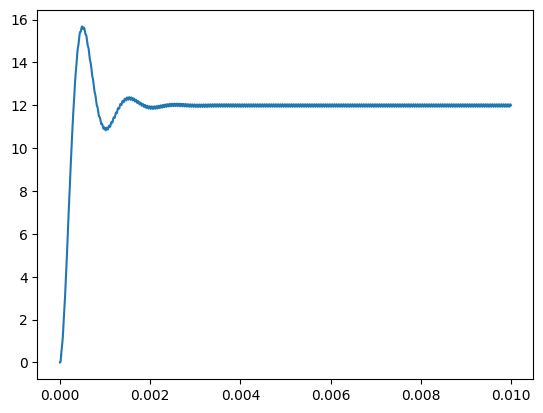

In [16]:
L = 540e-6
C = 43.38e-6
fsw = 20e3

plecs.set(model+'/L1','L', str(L))
plecs.set(model+'/C', 'C', str(C))
plecs.set(model+'/Symmetrical PWM1', 'fc', str(fsw))
times = plecs.simulate(model) ['Time']
current = plecs.simulate(model) ['Values'][0]
voltage = plecs.simulate(model) ['Values'][1]

plt.plot(times,voltage)

In [6]:
import itertools
import random

# Given values
L_values = [540e-6]
C_values = [43.38e-6]
fsw_range = (10e3, 30e3)  # Range for fsw
num_fsw_values = 20

# Create all possible combinations
all_combinations = list(itertools.product(L_values, C_values))

# Display 20 combinations with randomly chosen fsw values
for _ in range(num_fsw_values):
    for combination in all_combinations:
        L, C = combination
        fsw = random.uniform(*fsw_range)
        print(f'Combination: L={L}, C={C}, fsw={fsw:.2f}')


Combination: L=0.00054, C=4.338e-05, fsw=25049.55
Combination: L=0.00054, C=4.338e-05, fsw=15544.34
Combination: L=0.00054, C=4.338e-05, fsw=13650.70
Combination: L=0.00054, C=4.338e-05, fsw=23536.51
Combination: L=0.00054, C=4.338e-05, fsw=29284.85
Combination: L=0.00054, C=4.338e-05, fsw=13156.72
Combination: L=0.00054, C=4.338e-05, fsw=20776.21
Combination: L=0.00054, C=4.338e-05, fsw=24036.52
Combination: L=0.00054, C=4.338e-05, fsw=17842.61
Combination: L=0.00054, C=4.338e-05, fsw=23128.44
Combination: L=0.00054, C=4.338e-05, fsw=23984.15
Combination: L=0.00054, C=4.338e-05, fsw=29364.60
Combination: L=0.00054, C=4.338e-05, fsw=27032.92
Combination: L=0.00054, C=4.338e-05, fsw=25552.53
Combination: L=0.00054, C=4.338e-05, fsw=24945.26
Combination: L=0.00054, C=4.338e-05, fsw=21037.99
Combination: L=0.00054, C=4.338e-05, fsw=28556.53
Combination: L=0.00054, C=4.338e-05, fsw=16543.23
Combination: L=0.00054, C=4.338e-05, fsw=26329.61
Combination: L=0.00054, C=4.338e-05, fsw=20949.18


In [10]:
import itertools
import random
import numpy as np

# Given values
L_range = (30e-6, 2000e-6)  # Range for L
C_values = [43.38e-6]
fsw_range = (20e3, 200e3)  # Range for fsw
num_combinations = 20  # Number of combinations to generate

# Adjust the following variable to control both num_L_values and num_fsw_values
num_values = 20  # Adjust as needed

# Create arrays of discrete L values and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values)

# Create all possible combinations
all_combinations = list(itertools.product(L_values, C_values, fsw_values))

# Display num_combinations combinations
num = 0
for _ in range(num_combinations):
    combination = random.choice(all_combinations)
    L, C, fsw = combination
    num +=1
    print(f'Combination {num}: L={L:.6f}, C={C}, fsw={fsw:.2f}')


Combination 1: L=0.001171, C=4.338e-05, fsw=67368.42
Combination 2: L=0.000134, C=4.338e-05, fsw=95789.47
Combination 3: L=0.001482, C=4.338e-05, fsw=171578.95
Combination 4: L=0.000548, C=4.338e-05, fsw=20000.00
Combination 5: L=0.000652, C=4.338e-05, fsw=124210.53
Combination 6: L=0.001274, C=4.338e-05, fsw=105263.16
Combination 7: L=0.000445, C=4.338e-05, fsw=171578.95
Combination 8: L=0.000548, C=4.338e-05, fsw=162105.26
Combination 9: L=0.001378, C=4.338e-05, fsw=200000.00
Combination 10: L=0.001896, C=4.338e-05, fsw=95789.47
Combination 11: L=0.001378, C=4.338e-05, fsw=152631.58
Combination 12: L=0.001171, C=4.338e-05, fsw=200000.00
Combination 13: L=0.000445, C=4.338e-05, fsw=95789.47
Combination 14: L=0.000237, C=4.338e-05, fsw=67368.42
Combination 15: L=0.001585, C=4.338e-05, fsw=38947.37
Combination 16: L=0.000548, C=4.338e-05, fsw=190526.32
Combination 17: L=0.000237, C=4.338e-05, fsw=114736.84
Combination 18: L=0.001896, C=4.338e-05, fsw=152631.58
Combination 19: L=0.001689

In [11]:
import itertools
import random
import numpy as np

# Given values
L_range = (30e-6, 2000e-6)  # Range for L
C_values = [43.38e-6]
fsw_range = (20e3, 200e3)  # Range for fsw
num_combinations = 20  # Number of combinations to generate

# Adjust the following variable to control both num_L_values and num_fsw_values
num_values = 20  # Adjust as needed

# Create arrays of discrete L values and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values)

# Create all possible combinations
all_combinations = list(itertools.product(L_values, C_values, fsw_values))

# Display num_combinations combinations
num = 0
for _ in range(num_combinations):
    combination = random.choice(all_combinations)
    L, C, fsw = combination

    # Rules for picking R_L based on L
    if L <= 144e-6:
        R_L = 0.079576
    elif 144e-6 < L <= 509e-6:
        R_L = 0.179228
    elif 509e-6 < L <= 1003e-6:
        R_L = 0.253239
    elif 1003e-6 < L <= 2519e-6:
        R_L = 0.443394
    else:
        R_L = 0.0  # Default value for cases outside specified ranges

    num += 1
    print(f'Combination {num}: L={L:.6f}, C={C}, fsw={fsw:.2f}, R_L={R_L:.6f}')


Combination 1: L=0.001585, C=4.338e-05, fsw=133684.21, R_L=0.443394
Combination 2: L=0.002000, C=4.338e-05, fsw=29473.68, R_L=0.443394
Combination 3: L=0.001585, C=4.338e-05, fsw=124210.53, R_L=0.443394
Combination 4: L=0.002000, C=4.338e-05, fsw=86315.79, R_L=0.443394
Combination 5: L=0.000652, C=4.338e-05, fsw=48421.05, R_L=0.253239
Combination 6: L=0.001274, C=4.338e-05, fsw=133684.21, R_L=0.443394
Combination 7: L=0.000445, C=4.338e-05, fsw=162105.26, R_L=0.179228
Combination 8: L=0.001793, C=4.338e-05, fsw=181052.63, R_L=0.443394
Combination 9: L=0.001378, C=4.338e-05, fsw=86315.79, R_L=0.443394
Combination 10: L=0.000548, C=4.338e-05, fsw=181052.63, R_L=0.253239
Combination 11: L=0.000134, C=4.338e-05, fsw=200000.00, R_L=0.079576
Combination 12: L=0.001585, C=4.338e-05, fsw=20000.00, R_L=0.443394
Combination 13: L=0.001585, C=4.338e-05, fsw=20000.00, R_L=0.443394
Combination 14: L=0.000652, C=4.338e-05, fsw=162105.26, R_L=0.253239
Combination 15: L=0.001793, C=4.338e-05, fsw=6736

In [12]:
import random
import numpy as np

# Given values
L_range = (30e-6, 2000e-6)  # Range for L
C_values = [43.38e-6]
fsw_range = (20e3, 200e3)  # Range for fsw
num_combinations = 20  # Number of combinations to generate

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Adjust the following variable to control both num_L_values and num_fsw_values
num_values = 20  # Adjust as needed

# Create arrays of discrete L values and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values)

# Display num_combinations combinations
num = 0
for _ in range(num_combinations):
    L, C, fsw = random.choice(list(itertools.product(L_values, C_values, fsw_values)))

    # Rules for picking R_L based on L
    R_L = next((rl for border, rl in border_values if L <= border), 0.0)

    num += 1
    print(f'Combination {num}: L={L:.6f}, C={C}, fsw={fsw:.2f}, R_L={R_L:.6f}')


Combination 1: L=0.001896, C=4.338e-05, fsw=57894.74, R_L=0.443394
Combination 2: L=0.000548, C=4.338e-05, fsw=67368.42, R_L=0.253239
Combination 3: L=0.001585, C=4.338e-05, fsw=114736.84, R_L=0.443394
Combination 4: L=0.000963, C=4.338e-05, fsw=57894.74, R_L=0.253239
Combination 5: L=0.001896, C=4.338e-05, fsw=67368.42, R_L=0.443394
Combination 6: L=0.001171, C=4.338e-05, fsw=76842.11, R_L=0.443394
Combination 7: L=0.001896, C=4.338e-05, fsw=29473.68, R_L=0.443394
Combination 8: L=0.000548, C=4.338e-05, fsw=200000.00, R_L=0.253239
Combination 9: L=0.000341, C=4.338e-05, fsw=114736.84, R_L=0.179228
Combination 10: L=0.000237, C=4.338e-05, fsw=105263.16, R_L=0.179228
Combination 11: L=0.000859, C=4.338e-05, fsw=181052.63, R_L=0.253239
Combination 12: L=0.000859, C=4.338e-05, fsw=57894.74, R_L=0.253239
Combination 13: L=0.001067, C=4.338e-05, fsw=162105.26, R_L=0.443394
Combination 14: L=0.000237, C=4.338e-05, fsw=105263.16, R_L=0.179228
Combination 15: L=0.000859, C=4.338e-05, fsw=76842

In [13]:
import random
import numpy as np

# Given values
L_range = (30e-6, 2000e-6)  # Range for L
C_range = (30e-6, 200e-6)   # Range for C
fsw_range = (20e3, 200e3)    # Range for fsw
num_combinations = 20        # Number of combinations to generate

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Adjust the following variable to control both num_L_values and num_fsw_values
num_values = 20  # Adjust as needed

# Create arrays of discrete L, C, and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
C_values = np.linspace(C_range[0], C_range[1], num=num_values)
fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values)

# Display num_combinations combinations
num = 0
for _ in range(num_combinations):
    L, C, fsw = random.choice(list(itertools.product(L_values, C_values, fsw_values)))

    # Rules for picking R_L based on L
    R_L = next((rl for border, rl in border_values if L <= border), 0.0)

    num += 1
    print(f'Combination {num}: L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}, R_L={R_L:.6f}')


Combination 1: L=0.001482, C=0.000066, fsw=105263.16, R_L=0.443394
Combination 2: L=0.001482, C=0.000084, fsw=152631.58, R_L=0.443394
Combination 3: L=0.001896, C=0.000066, fsw=171578.95, R_L=0.443394
Combination 4: L=0.001378, C=0.000119, fsw=95789.47, R_L=0.443394
Combination 5: L=0.000963, C=0.000173, fsw=171578.95, R_L=0.253239
Combination 6: L=0.000963, C=0.000030, fsw=143157.89, R_L=0.253239
Combination 7: L=0.001274, C=0.000173, fsw=143157.89, R_L=0.443394
Combination 8: L=0.000548, C=0.000048, fsw=133684.21, R_L=0.253239
Combination 9: L=0.000859, C=0.000155, fsw=29473.68, R_L=0.253239
Combination 10: L=0.000341, C=0.000164, fsw=181052.63, R_L=0.179228
Combination 11: L=0.000445, C=0.000146, fsw=124210.53, R_L=0.179228
Combination 12: L=0.000859, C=0.000030, fsw=67368.42, R_L=0.253239
Combination 13: L=0.000341, C=0.000173, fsw=143157.89, R_L=0.179228
Combination 14: L=0.000237, C=0.000084, fsw=67368.42, R_L=0.179228
Combination 15: L=0.000341, C=0.000128, fsw=57894.74, R_L=0.1

In [15]:
import random
import numpy as np

# Given values
L_range = (30e-6, 2000e-6)  # Range for L
C_range = (30e-6, 200e-6)   # Range for C
fsw_range = (20e3, 200e3)    # Range for fsw
num_combinations = 20        # Number of combinations to generate

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Constants for ESL calculation
K_esl = 4.389e-11  # Adjust as needed
tan_delta = 0.14
# Adjust the following variable to control both num_L_values and num_fsw_values
num_values = 20  # Adjust as needed

# Create arrays of discrete L, C, and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
C_values = np.linspace(C_range[0], C_range[1], num=num_values)
fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values)

# Display num_combinations combinations
num = 0
for _ in range(num_combinations):
    L, C, fsw = random.choice(list(itertools.product(L_values, C_values, fsw_values)))

    # Rules for picking R_L based on L
    R_L = next((rl for border, rl in border_values if L <= border), 0.0)

    # Calculate ESR and ESL based on the updated C
    ESR = tan_delta / (2 * np.pi * fsw * C)
    ESL = K_esl / C

    num += 1
    print(f'Combination {num}: L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}, R_L={R_L:.6f}, ESR={ESR:.6f}, ESL={ESL:.6e}')


Combination 1: L=0.001793, C=0.000084, fsw=200000.00, R_L=0.443394, ESR=0.001331, ESL=5.244717e-07
Combination 2: L=0.001274, C=0.000066, fsw=200000.00, R_L=0.443394, ESR=0.001693, ESL=6.671280e-07
Combination 3: L=0.000030, C=0.000191, fsw=48421.05, R_L=0.079576, ESR=0.002409, ESL=2.297273e-07
Combination 4: L=0.002000, C=0.000200, fsw=181052.63, R_L=0.443394, ESR=0.000615, ESL=2.194500e-07
Combination 5: L=0.000237, C=0.000057, fsw=133684.21, R_L=0.179228, ESR=0.002932, ESL=7.721389e-07
Combination 6: L=0.000963, C=0.000030, fsw=143157.89, R_L=0.253239, ESR=0.005188, ESL=1.463000e-06
Combination 7: L=0.001482, C=0.000200, fsw=181052.63, R_L=0.443394, ESR=0.000615, ESL=2.194500e-07
Combination 8: L=0.000963, C=0.000066, fsw=114736.84, R_L=0.253239, ESR=0.002952, ESL=6.671280e-07
Combination 9: L=0.000859, C=0.000182, fsw=67368.42, R_L=0.253239, ESR=0.001816, ESL=2.410145e-07
Combination 10: L=0.000859, C=0.000146, fsw=57894.74, R_L=0.253239, ESR=0.002630, ESL=2.999676e-07
Combination 

In [1]:
import itertools
import random
import numpy as np

# Given values
L_range = (30e-6, 2000e-6)  # Range for L
C_range = (30e-6, 200e-6)   # Range for C
fsw_range = (20e3, 200e3)    # Range for fsw
num_values = 20              # Number of values for each parameter

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Constants for ESL calculation
K_esl = 4.389e-11  # Adjust as needed
tan_delta = 0.14

# Create arrays of discrete L, C, and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
C_values = np.linspace(C_range[0], C_range[1], num=num_values)
fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values)

# Generate all possible combinations
all_combinations = list(itertools.product(L_values, C_values, fsw_values))

# Display num_combinations combinations
num = 0
for combination in all_combinations:
    L, C, fsw = combination

    # Rules for picking R_L based on L
    R_L = next((rl for border, rl in border_values if L <= border), 0.0)

    # Calculate ESR and ESL based on the updated C
    ESR = tan_delta / (2 * np.pi * fsw * C)
    ESL = K_esl / C

    num += 1
    print(f'Combination {num}: L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}, R_L={R_L:.6f}, ESR={ESR:.6f}, ESL={ESL:.6e}')


Combination 1: L=0.000030, C=0.000030, fsw=20000.00, R_L=0.079576, ESR=0.037136, ESL=1.463000e-06
Combination 2: L=0.000030, C=0.000030, fsw=29473.68, R_L=0.079576, ESR=0.025200, ESL=1.463000e-06
Combination 3: L=0.000030, C=0.000030, fsw=38947.37, R_L=0.079576, ESR=0.019070, ESL=1.463000e-06
Combination 4: L=0.000030, C=0.000030, fsw=48421.05, R_L=0.079576, ESR=0.015339, ESL=1.463000e-06
Combination 5: L=0.000030, C=0.000030, fsw=57894.74, R_L=0.079576, ESR=0.012829, ESL=1.463000e-06
Combination 6: L=0.000030, C=0.000030, fsw=67368.42, R_L=0.079576, ESR=0.011025, ESL=1.463000e-06
Combination 7: L=0.000030, C=0.000030, fsw=76842.11, R_L=0.079576, ESR=0.009666, ESL=1.463000e-06
Combination 8: L=0.000030, C=0.000030, fsw=86315.79, R_L=0.079576, ESR=0.008605, ESL=1.463000e-06
Combination 9: L=0.000030, C=0.000030, fsw=95789.47, R_L=0.079576, ESR=0.007754, ESL=1.463000e-06
Combination 10: L=0.000030, C=0.000030, fsw=105263.16, R_L=0.079576, ESR=0.007056, ESL=1.463000e-06
Combination 11: L=

In [2]:
import itertools
import random
import numpy as np

# Given values
L_range = (30e-6, 2000e-6)  # Range for L
C_range = (30e-6, 200e-6)   # Range for C
fsw_range = (20e3, 200e3)    # Range for fsw
num_values = 20              # Number of values for each parameter

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Constants for ESL calculation
K_esl = 4.389e-11  # Adjust as needed
tan_delta = 0.14

# Create arrays of discrete L, C, and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
C_values = np.linspace(C_range[0], C_range[1], num=num_values)
fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values)

# Generate all possible combinations
all_combinations = list(itertools.product(L_values, C_values, fsw_values))

# Display combinations in groups of 20
for i in range(0, len(all_combinations), num_values**2):
    group_combinations = all_combinations[i:i + num_values**2]
    num = 0
    for combination in group_combinations:
        L, C, fsw = combination

        # Rules for picking R_L based on L
        R_L = next((rl for border, rl in border_values if L <= border), 0.0)

        # Calculate ESR and ESL based on the updated C
        ESR = tan_delta / (2 * np.pi * fsw * C)
        ESL = K_esl / C

        num += 1
        print(f'Group {i//num_values**2 + 1}, Combination {num}: L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}, R_L={R_L:.6f}, ESR={ESR:.6f}, ESL={ESL:.6e}')


Group 1, Combination 1: L=0.000030, C=0.000030, fsw=20000.00, R_L=0.079576, ESR=0.037136, ESL=1.463000e-06
Group 1, Combination 2: L=0.000030, C=0.000030, fsw=29473.68, R_L=0.079576, ESR=0.025200, ESL=1.463000e-06
Group 1, Combination 3: L=0.000030, C=0.000030, fsw=38947.37, R_L=0.079576, ESR=0.019070, ESL=1.463000e-06
Group 1, Combination 4: L=0.000030, C=0.000030, fsw=48421.05, R_L=0.079576, ESR=0.015339, ESL=1.463000e-06
Group 1, Combination 5: L=0.000030, C=0.000030, fsw=57894.74, R_L=0.079576, ESR=0.012829, ESL=1.463000e-06
Group 1, Combination 6: L=0.000030, C=0.000030, fsw=67368.42, R_L=0.079576, ESR=0.011025, ESL=1.463000e-06
Group 1, Combination 7: L=0.000030, C=0.000030, fsw=76842.11, R_L=0.079576, ESR=0.009666, ESL=1.463000e-06
Group 1, Combination 8: L=0.000030, C=0.000030, fsw=86315.79, R_L=0.079576, ESR=0.008605, ESL=1.463000e-06
Group 1, Combination 9: L=0.000030, C=0.000030, fsw=95789.47, R_L=0.079576, ESR=0.007754, ESL=1.463000e-06
Group 1, Combination 10: L=0.000030, 

# With combination

In [3]:
import itertools
import random
import numpy as np

# Given values
L_range = (30e-6, 2000e-6)  # Range for L
C_range = (30e-6, 200e-6)   # Range for C
fsw_range = (20e3, 200e3)    # Range for fsw
num_values = 20              # Number of values for each parameter

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Constants for ESL calculation
K_esl = 4.389e-11  # Adjust as needed
tan_delta = 0.14

# Create arrays of discrete L, C, and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
C_values = np.linspace(C_range[0], C_range[1], num=num_values)
fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values)

# Display the first 20 chosen values
print("First 20 chosen values:")
for _ in range(num_values):
    L = random.choice(L_values)
    C = random.choice(C_values)
    fsw = random.choice(fsw_values)
    print(f'L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}')

# Generate all possible combinations
all_combinations = list(itertools.product(L_values, C_values, fsw_values))

# Display num_combinations combinations
num = 0
for combination in all_combinations:
    L, C, fsw = combination

    # Rules for picking R_L based on L
    R_L = next((rl for border, rl in border_values if L <= border), 0.0)

    # Calculate ESR and ESL based on the updated C
    ESR = tan_delta / (2 * np.pi * fsw * C)
    ESL = K_esl / C

    num += 1
    print(f'Combination {num}: L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}, R_L={R_L:.6f}, ESR={ESR:.6f}, ESL={ESL:.6e}')


First 20 chosen values:
L=0.001482, C=0.000119, fsw=171578.95
L=0.000652, C=0.000057, fsw=86315.79
L=0.001793, C=0.000191, fsw=143157.89
L=0.000963, C=0.000137, fsw=67368.42
L=0.002000, C=0.000200, fsw=181052.63
L=0.001585, C=0.000111, fsw=20000.00
L=0.000756, C=0.000128, fsw=190526.32
L=0.000341, C=0.000155, fsw=105263.16
L=0.001067, C=0.000093, fsw=20000.00
L=0.000445, C=0.000030, fsw=76842.11
L=0.001482, C=0.000057, fsw=48421.05
L=0.001378, C=0.000164, fsw=124210.53
L=0.000756, C=0.000093, fsw=114736.84
L=0.001896, C=0.000093, fsw=171578.95
L=0.001896, C=0.000057, fsw=181052.63
L=0.001274, C=0.000057, fsw=95789.47
L=0.000548, C=0.000119, fsw=67368.42
L=0.001274, C=0.000102, fsw=29473.68
L=0.000445, C=0.000102, fsw=152631.58
L=0.000756, C=0.000146, fsw=152631.58
Combination 1: L=0.000030, C=0.000030, fsw=20000.00, R_L=0.079576, ESR=0.037136, ESL=1.463000e-06
Combination 2: L=0.000030, C=0.000030, fsw=29473.68, R_L=0.079576, ESR=0.025200, ESL=1.463000e-06
Combination 3: L=0.000030, C=

First 20 chosen values:
L=0.000030, C=0.000115, fsw=20000.00


L=0.000030, C=0.000030, fsw=200000.00
L=0.001508, C=0.000030, fsw=65000.00
L=0.001508, C=0.000158, fsw=155000.00
L=0.002000, C=0.000200, fsw=65000.00


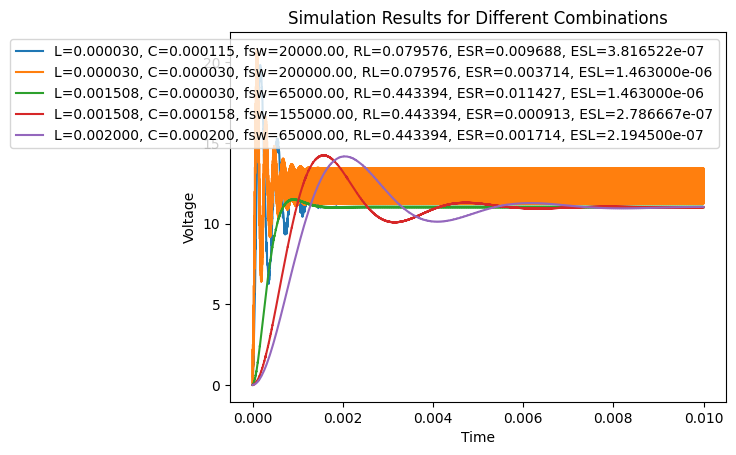

In [31]:
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt

# Given values
L_range = (30e-6, 2000e-6)  # Range for L
C_range = (30e-6, 200e-6)   # Range for C
fsw_range = (20e3, 200e3)    # Range for fsw
num_values = 5             # Number of values for each parameter

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Constants for ESL calculation
K_esl = 4.389e-11  # Adjust as needed
tan_delta = 0.14

# Create arrays of discrete L, C, and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
C_values = np.linspace(C_range[0], C_range[1], num=num_values)
fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values)

# Display the first 20 chosen values
print("First 20 chosen values:")
for _ in range(num_values):
    L = random.choice(L_values)
    C = random.choice(C_values)
    fsw = random.choice(fsw_values)
    print(f'L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}')

    # Rules for picking R_L based on L
    R_L = next((rl for border, rl in border_values if L <= border), 0.0)

    # Calculate ESR and ESL based on the updated C
    ESR = tan_delta / (2 * np.pi * fsw * C)
    ESL = K_esl / C

    # Set Plecs parameters and simulate
    plecs.set(model+'/L1', 'L', str(L))
    plecs.set(model+'/C', 'C', str(C))
    plecs.set(model+'/Symmetrical PWM1', 'fc', str(fsw))
    plecs.set(model+'/RL', 'R', str(R_L))
    plecs.set(model+'/ESR', 'R', str(ESR))
    plecs.set(model+'/ESL', 'L', str(ESL))

    times = plecs.simulate(model)['Time']
    voltage = plecs.simulate(model)['Values'][1]

    # Plot the simulation result
    plt.plot(times, voltage, label=f'L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}, RL={R_L:.6f}, ESR={ESR:.6f}, ESL={ESL:.6e}')

# Show the plot
plt.legend()
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Simulation Results for Different Combinations')
plt.show()


First 20 chosen values:


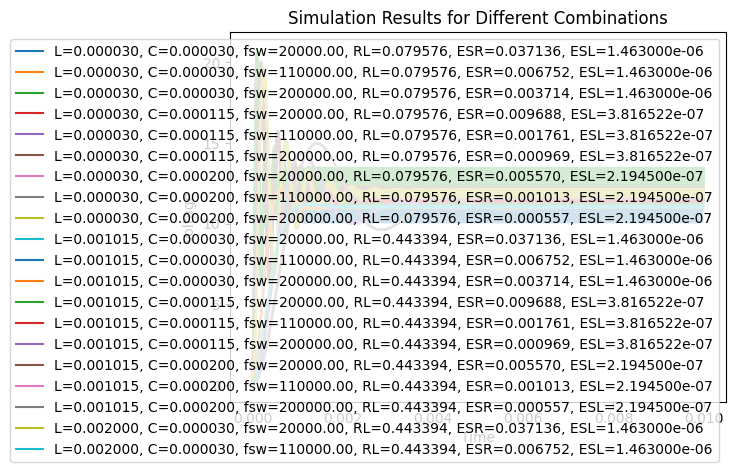

In [7]:
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt

# Given values
L_range = (30e-6, 2000e-6)  # Range for L
C_range = (30e-6, 200e-6)   # Range for C
fsw_range = (20e3, 200e3)    # Range for fsw
num_values = 3            # Number of values for each parameter

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Constants for ESL calculation
K_esl = 4.389e-11  # Adjust as needed
tan_delta = 0.14

# Create arrays of discrete L, C, and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
C_values = np.linspace(C_range[0], C_range[1], num=num_values)
fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values)

# Generate all combinations of L, C, and fsw
combinations = list(itertools.product(L_values, C_values, fsw_values))

# Display the first 20 chosen values
print("First 20 chosen values:")
for L, C, fsw in combinations[:20]:
    # Rules for picking R_L based on L
    R_L = next((rl for border, rl in border_values if L <= border), 0.0)

    # Calculate ESR and ESL based on the updated C
    ESR = tan_delta / (2 * np.pi * fsw * C)
    ESL = K_esl / C

    # Set Plecs parameters and simulate
    plecs.set(model+'/L1', 'L', str(L))
    plecs.set(model+'/C', 'C', str(C))
    plecs.set(model+'/Symmetrical PWM1', 'fc', str(fsw))
    plecs.set(model+'/RL', 'R', str(R_L))
    plecs.set(model+'/ESR', 'R', str(ESR))
    plecs.set(model+'/ESL', 'L', str(ESL))

    times = plecs.simulate(model)['Time']
    voltage = plecs.simulate(model)['Values'][1]

    # Plot the simulation result
    plt.plot(times, voltage, label=f'L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}, RL={R_L:.6f}, ESR={ESR:.6f}, ESL={ESL:.6e}')

# Show the plot
plt.legend()
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Simulation Results for Different Combinations')
plt.show()


Chosen L values: [3.000e-05 1.015e-03 2.000e-03]
Chosen C values: [3.00e-05 1.15e-04 2.00e-04]
Chosen fsw values: [ 20000. 110000. 200000.]

Chosen values and simulation results:

Simulation for L=0.000030, C=0.000030, fsw=20000.00

Simulation for L=0.000030, C=0.000030, fsw=110000.00

Simulation for L=0.000030, C=0.000030, fsw=200000.00

Simulation for L=0.000030, C=0.000115, fsw=20000.00

Simulation for L=0.000030, C=0.000115, fsw=110000.00

Simulation for L=0.000030, C=0.000115, fsw=200000.00

Simulation for L=0.000030, C=0.000200, fsw=20000.00

Simulation for L=0.000030, C=0.000200, fsw=110000.00

Simulation for L=0.000030, C=0.000200, fsw=200000.00

Simulation for L=0.001015, C=0.000030, fsw=20000.00

Simulation for L=0.001015, C=0.000030, fsw=110000.00

Simulation for L=0.001015, C=0.000030, fsw=200000.00

Simulation for L=0.001015, C=0.000115, fsw=20000.00

Simulation for L=0.001015, C=0.000115, fsw=110000.00

Simulation for L=0.001015, C=0.000115, fsw=200000.00

Simulation for 

C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


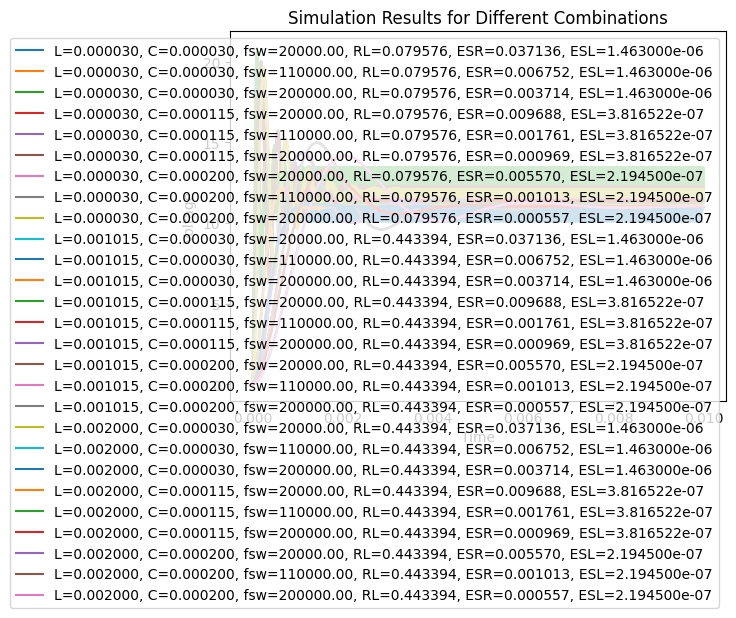

In [8]:
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt

# Given values
L_range = (30e-6, 2000e-6)  # Range for L
C_range = (30e-6, 200e-6)   # Range for C
fsw_range = (20e3, 200e3)    # Range for fsw
num_values = 3            # Number of values for each parameter

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Constants for ESL calculation
K_esl = 4.389e-11  # Adjust as needed
tan_delta = 0.14

# Create arrays of discrete L, C, and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
C_values = np.linspace(C_range[0], C_range[1], num=num_values)
fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values)

# Print the chosen values
print("Chosen L values:", L_values)
print("Chosen C values:", C_values)
print("Chosen fsw values:", fsw_values)

# Generate all combinations of L, C, and fsw
combinations = list(itertools.product(L_values, C_values, fsw_values))

# Display the chosen values and simulate
print("\nChosen values and simulation results:")
for L, C, fsw in combinations:
    print(f'\nSimulation for L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}')

    # Rules for picking R_L based on L
    R_L = next((rl for border, rl in border_values if L <= border), 0.0)

    # Calculate ESR and ESL based on the updated C
    ESR = tan_delta / (2 * np.pi * fsw * C)
    ESL = K_esl / C

    # Set Plecs parameters and simulate
    plecs.set(model+'/L1', 'L', str(L))
    plecs.set(model+'/C', 'C', str(C))
    plecs.set(model+'/Symmetrical PWM1', 'fc', str(fsw))
    plecs.set(model+'/RL', 'R', str(R_L))
    plecs.set(model+'/ESR', 'R', str(ESR))
    plecs.set(model+'/ESL', 'L', str(ESL))

    times = plecs.simulate(model)['Time']
    voltage = plecs.simulate(model)['Values'][1]

    # Plot the simulation result
    plt.plot(times, voltage, label=f'L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}, RL={R_L:.6f}, ESR={ESR:.6f}, ESL={ESL:.6e}')

# Show the plot
plt.legend()
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Simulation Results for Different Combinations')
plt.show()


In [10]:
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt

# Given values
L_range = (30e-6, 2000e-6)  # Range for L
C_range = (30e-6, 200e-6)   # Range for C
fsw_range = (20e3, 200e3)    # Range for fsw
num_values = 3            # Number of values for each parameter

# Borders for R_L
border_values = [
    (144e-6, 0.079576),
    (509e-6, 0.179228),
    (1003e-6, 0.253239),
    (2519e-6, 0.443394)
]

# Constants for ESL calculation
K_esl = 4.389e-11  # Adjust as needed
tan_delta = 0.14

# Create arrays of discrete L, C, and fsw values within the specified ranges
L_values = np.linspace(L_range[0], L_range[1], num=num_values)
C_values = np.linspace(C_range[0], C_range[1], num=num_values)
fsw_values = np.linspace(fsw_range[0], fsw_range[1], num=num_values)

# Print the chosen values
print("Chosen L values:", L_values)
print("Chosen C values:", C_values)
print("Chosen fsw values:", fsw_values)

# Generate all combinations of L, C, and fsw
combinations = list(itertools.product(L_values, C_values, fsw_values))

# Display the chosen values and simulate
print("\nChosen values and simulation results:")
for simulation_num, (L, C, fsw) in enumerate(combinations, start=1):
    print(f'\nSimulation {simulation_num} for L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}, RL={R_L:.6f}, ESR={ESR:.6f}, ESL={ESL:.6e}')

    # Rules for picking R_L based on L
    R_L = next((rl for border, rl in border_values if L <= border), 0.0)

    # Calculate ESR and ESL based on the updated C
    ESR = tan_delta / (2 * np.pi * fsw * C)
    ESL = K_esl / C

    # Set Plecs parameters and simulate
    plecs.set(model+'/L1', 'L', str(L))
    plecs.set(model+'/C', 'C', str(C))
    plecs.set(model+'/Symmetrical PWM1', 'fc', str(fsw))
    plecs.set(model+'/RL', 'R', str(R_L))
    plecs.set(model+'/ESR', 'R', str(ESR))
    plecs.set(model+'/ESL', 'L', str(ESL))

    times = plecs.simulate(model)['Time']
    voltage = plecs.simulate(model)['Values'][1]

    # Plot the simulation result
    plt.plot(times, voltage, label=f'L={L:.6f}, C={C:.6f}, fsw={fsw:.2f}, RL={R_L:.6f}, ESR={ESR:.6f}, ESL={ESL:.6e}')

# Show the plot
plt.legend()
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Simulation Results for Different Combinations')
plt.show()


Chosen L values: [3.000e-05 1.015e-03 2.000e-03]
Chosen C values: [3.00e-05 1.15e-04 2.00e-04]
Chosen fsw values: [ 20000. 110000. 200000.]

Chosen values and simulation results:

Simulation 1 for L=0.000030, C=0.000030, fsw=20000.00, RL=0.443394, ESR=0.000557, ESL=2.194500e-07


## Loop and save into CSV

In [21]:
import os
import csv

# Assuming you have a list of values for L, C, and fsw for each iteration
list_of_L_values = [540e-6, 600e-6, 700e-6]
list_of_C_values = [43.38e-6, 50e-6, 60e-6]
list_of_fsw_values = [20e3, 25e3, 30e3]

# Initialize the base directory for saving files
base_directory = 'simulation_results/'

# Create the base directory if it doesn't exist
os.makedirs(base_directory, exist_ok=True)

# Iterate over each set of values
for i in range(len(list_of_L_values)):
    L = list_of_L_values[i]
    C = list_of_C_values[i]
    fsw = list_of_fsw_values[i]

    # Set values in the PLECS model
    plecs.set(model+'/L1', 'L', str(L))
    plecs.set(model+'/C', 'C', str(C))
    plecs.set(model+'/Symmetrical PWM1', 'fc', str(fsw))

    # Simulate the PLECS model and obtain time, current, and voltage data
    times = plecs.simulate(model)['Time']
    current = plecs.simulate(model)['Values'][0]
    voltage = plecs.simulate(model)['Values'][1]

    # Create the CSV filename based on L, C, and fsw values
    csv_filename = os.path.join(base_directory, f'simulation_results_L_{L}_C_{C}_fsw_{fsw}.csv')

    # Write the time, voltage, and current to the CSV file
    with open(csv_filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Time', 'Voltage', 'Current'])
        for t, V, I in zip(times, voltage, current):
            csv_writer.writerow([t, V, I])


# &Delta; Current n Voltage

## Average Current

Average Current between 0.004 and 0.005 seconds: 2.382900080756942 A


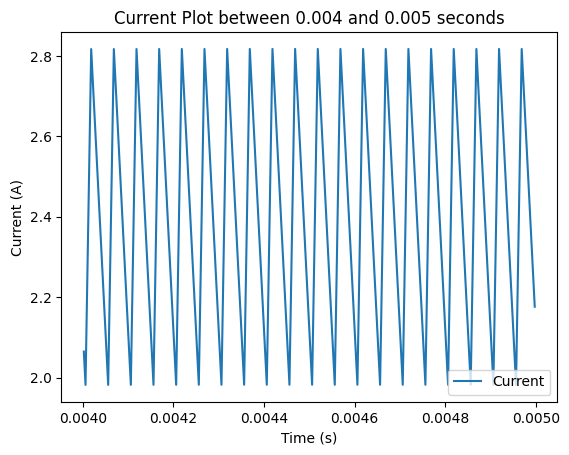

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'times' and 'current' are already defined

# Convert 'times' to a NumPy array
times = np.array(times)

# Find the indices corresponding to the time range
start_time = 0.004
end_time = 0.005

start_index = np.argmax(times >= start_time)
end_index = np.argmax(times >= end_time)

# Extract the current values in the specified time range
current_range = current[start_index:end_index]

# Calculate the average current value
average_current = np.mean(current_range)

print(f"Average Current between {start_time} and {end_time} seconds: {average_current} A")

# Plot only the current values in the specified time range
plt.plot(times[start_index:end_index], current_range, label='Current')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title(f'Current Plot between {start_time} and {end_time} seconds')
plt.legend()
plt.show()


## &Delta;I<sub>L</sub>%


Difference between highest and lowest current values between 0.004 and 0.005 seconds: 0.8350606168550487 A


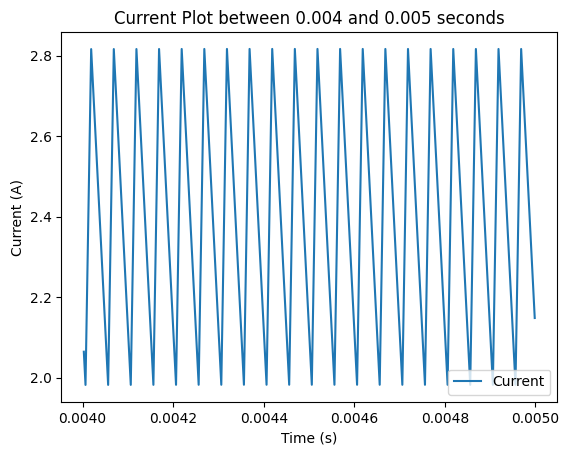

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'times' and 'current' are already defined

# Convert 'times' to a NumPy array
times = np.array(times)

# Find the indices corresponding to the time range
start_time = 0.004
end_time = 0.005

start_index = np.argmax(times >= start_time)
end_index = np.argmax(times >= end_time)

# Extract the current values in the specified time range
current_range = current[start_index:end_index]

# Calculate the difference between the highest and lowest current values
delta_current = np.max(current_range) - np.min(current_range)

print(f"Difference between highest and lowest current values between {start_time} and {end_time} seconds: {delta_current} A")

# Plot only the current values in the specified time range
plt.plot(times[start_index:end_index], current_range, label='Current')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title(f'Current Plot between {start_time} and {end_time} seconds')
plt.legend()
plt.show()


## &Delta;V<sub>O</sub>%


Difference between highest and lowest voltage values between 0.004 and 0.005 seconds: 0.11714774290565622 V


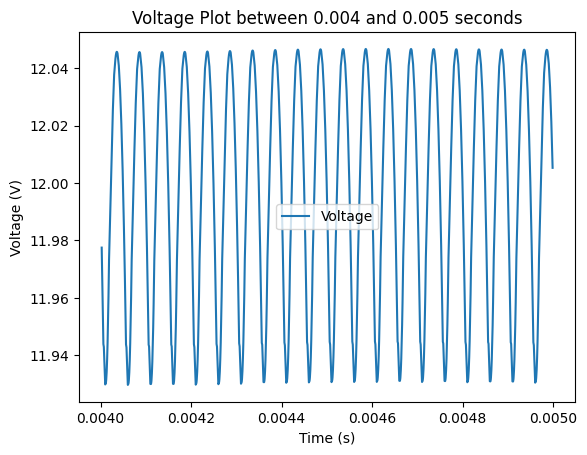

In [80]:
# Extract the current values in the specified time range
voltage_range = voltage[start_index:end_index]

# Calculate the difference between the highest and lowest current values
delta_voltage = np.max(voltage_range) - np.min(voltage_range)

print(f"Difference between highest and lowest voltage values between {start_time} and {end_time} seconds: {delta_voltage} V")

# Plot only the current values in the specified time range
plt.plot(times[start_index:end_index], voltage_range, label='Voltage')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title(f'Voltage Plot between {start_time} and {end_time} seconds')
plt.legend()
plt.show()


In [ ]:
# Get current values from the simulation
current = plecs.simulate(model)['Values'][0]

# Define the window size for the moving average
window_size = 100

# Calculate the moving average
moving_average = np.convolve(current, np.ones(window_size)/window_size, mode='valid')

# Plot the original and smoothed current values
plt.plot(times, current, label='Original Current')
plt.plot(times[:len(moving_average)], moving_average, label='Moving Average')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Current')
plt.legend()
plt.grid(True)
plt.title('Original and Smoothed Current')

# Show the plot
plt.show()

In [24]:
print(moving_average)

[2.02434026 2.06603734 2.10773442 ... 2.38625065 2.38819143 2.38957653]


# Losses

## Switching Losses

### Conduction Loss

- R<sub>DS(on)</sub> = R<sub>ON-H</sub> = R<sub>ON-L</sub> = 5.6k&Omega; 

#### High Side

P<sub>ON-H</sub> = I<sub>OUT</sub> / 2 &times; R<sub>ON-H</sub> &times; V<sub>OUT</sub> / V<sub>IN</sub> [W]


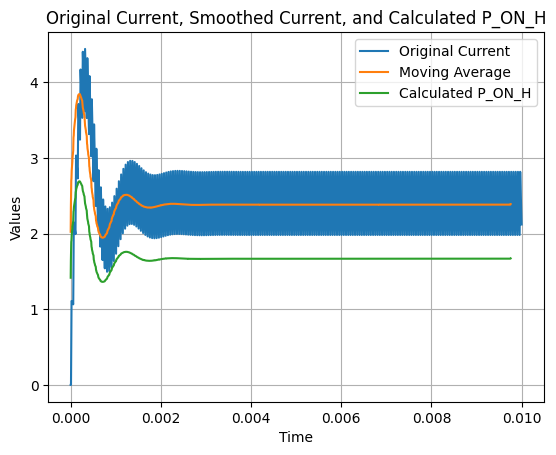

In [27]:
# Assuming you have R_ON_H, V_OUT, and V_IN defined
R_on = 5.6  # Replace with the actual value

# Calculate P_ON_H using the smoothed current values
P_ON_H = moving_average / 2 * R_on * V_out / V_in

# Plot the original and smoothed current values
plt.plot(times, current, label='Original Current')
plt.plot(times[:len(moving_average)], moving_average, label='Moving Average')

# Plot the calculated P_ON_H
plt.plot(times[:len(P_ON_H)], P_ON_H, label='Calculated P_ON_H')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.title('Original Current, Smoothed Current, and Calculated P_ON_H')

# Show the plot
plt.show()

In [47]:
# Assuming you have R_ON_H, V_OUT, and V_IN defined
R_on = 5.6  # Replace with the actual value

# Calculate P_ON_H using the smoothed current values
P_ON_H = average_current / 2 * R_on * V_out / V_in
print(P_ON_H)

1.6680300565298591


#### Low Side

P<sub>ON-L</sub> = I<sub>OUT</sub> / 2 &times; R<sub>ON-L</sub> &times; (1 - V<sub>OUT</sub> / V<sub>IN</sub>) [W]


In [ ]:
# Assuming you have R_ON_H, V_OUT, and V_IN defined
R_on = 5.6  # Replace with the actual value

# Calculate P_ON_L using the smoothed current values
P_ON_L = moving_average / 2 * R_on * V_out / V_in

# Plot the original and smoothed current values
plt.plot(times, current, label='Original Current')
plt.plot(times[:len(moving_average)], moving_average, label='Moving Average')

# Plot the calculated P_ON_L
plt.plot(times[:len(P_ON_L)], P_ON_L, label='Calculated P_ON_L')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.title('Original Current, Smoothed Current, and Calculated P_ON_L')

# Show the plot
plt.show()

In [46]:
# Assuming you have R_ON_H, V_OUT, and V_IN defined
R_on = 5.6  # Replace with the actual value

# Calculate P_ON_L using the smoothed current values
P_ON_L = average_current / 2 * R_on * V_out / V_in
print(P_ON_L)

1.6680300565298591


### Switching Losses

t<sub>rise</sub> = 110 ns  
t<sub>fall</sub> = 78 ns

#### High Side

P<sub>SW-H</sub> = 1/2 &times; V<sub>IN</sub> &times; I<sub>OUT</sub> &times; (t<sub>rise-H</sub> + t<sub>fall-H</sub>) &times; f<sub>SW</sub>


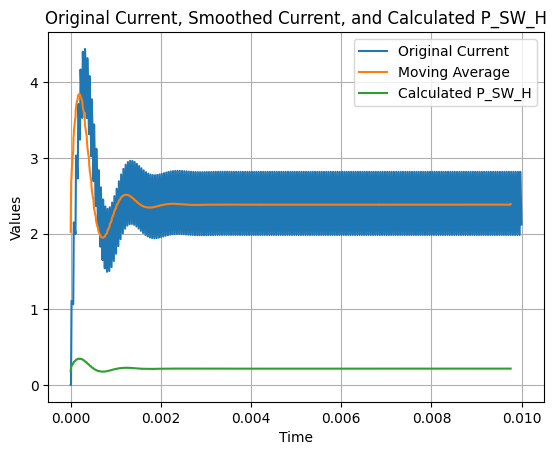

In [30]:
t_rise = 110e-9
t_fall = 78e-9

# Calculate P_SW_H
P_SW_H = 0.5 * V_in * moving_average * (t_rise + t_fall) * f_sw

# Plot the original and smoothed current values
plt.plot(times, current, label='Original Current')
plt.plot(times[:len(moving_average)], moving_average, label='Moving Average')

# Plot the calculated P_SW_H
plt.plot(times[:len(P_SW_H)], P_SW_H, label='Calculated P_SW_H')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.title('Original Current, Smoothed Current, and Calculated P_SW_H')

# Show the plot
plt.show()

In [49]:
t_rise = 110e-9
t_fall = 78e-9

# Calculate P_SW_H
P_SW_H = 0.5 * V_in * average_current * (t_rise + t_fall) * f_sw
print(P_SW_H)

0.2150329032875064


#### Low Side

P<sub>SW-L</sub> = 1/2 &times; V<sub>D</sub> &times; I<sub>OUT</sub> &times; (t<sub>rise-L</sub> + t<sub>fall-L</sub>) &times; f<sub>SW</sub>


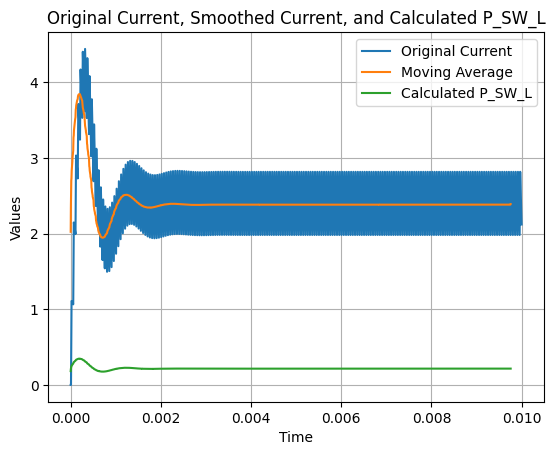

In [31]:
t_rise = 110e-9
t_fall = 78e-9

# Calculate P_SW_L
P_SW_L = 0.5 * V_in * moving_average * (t_rise + t_fall) * f_sw

# Plot the original and smoothed current values
plt.plot(times, current, label='Original Current')
plt.plot(times[:len(moving_average)], moving_average, label='Moving Average')

# Plot the calculated P_SW_L
plt.plot(times[:len(P_SW_L)], P_SW_L, label='Calculated P_SW_L')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.title('Original Current, Smoothed Current, and Calculated P_SW_L')

# Show the plot
plt.show()

In [50]:
t_rise = 110e-9
t_fall = 78e-9

# Calculate P_SW_L
P_SW_L = 0.5 * V_in * average_current * (t_rise + t_fall) * f_sw
print(P_SW_L)

0.2150329032875064


## Capacitor Loss

P<sub>CAP(ESR)</sub> = I<sub>CAP(RMS)</sub><sup>2</sup>  &#x00D7; ESR [W]



ESR = tan(&#x03B4;) / 2&pi;f<sub>SW</sub>C)


Dengan 25 V Nippon KZE series: tan &#x03B4; = 0.14

In [39]:
ESR = 0.14 / (2*np.pi*f_sw*C)
print(ESR)

0.025681987128706025


ESL = 1 / (4π² SRF² C)
- Assume SRF = 100kHz

In [60]:
SRF  = 100e3
ESL = 1 / (4*np.pi**2*SRF**2*C)

print(ESL)

5.839164571365709e-08


### Input Capacitor

I<sub>CIN(RMS)</sub> = I<sub>OUT</sub> &times; &radic;(V<sub>IN</sub> - V<sub>OUT</sub>) &times; V<sub>OUT</sub> / V<sub>IN</sub> [A]


In [53]:
I_cin = average_current * np.sqrt(V_in - V_out) * V_out / V_in
print(I_cin)

3.5743501211354123


### Output Capacitor

I<sub>COUT(RMS)</sub> = &Delta;I<sub>L</sub> / (2&radic;3) [A]

&Delta;I<sub>L</sub> = (V<sub>IN</sub> - V<sub>OUT</sub>) / (f<sub>SW</sub> &times; L) &times; V<sub>OUT</sub> / V<sub>IN</sub> [A]


In [35]:
I_L = ((V_in - V_out) / (f_sw * L)) * (V_out/V_in)
print(I_L)

0.8333333333333333


In [55]:
I_cout = I_L / (2*np.sqrt(3))
print(I_cout)

0.24056261216234406


### Total Loss

In [57]:
P_cap_in = I_cin**2 * ESR
P_cap_out = I_cout**2 * ESR

In [58]:
P_cap = P_cap_in + P_cap_out
print(P_cap)

0.32959874890885515


## Inductor Loss

### Magnetic Core Loss (Ansys) (Optional)

### Inductor Copper Loss

P<sub>Copper, L</sub> = I<sub>RMS</sub><sup>2</sup> &middot; R<sub>L</sub>
<br>
I<sub>RMS</sub> = &radic;(I<sub>AVG</sub><sup>2</sup> + <sup>1</sup>&frasl;<sub>12</sub> &Delta;I<sub>L</sub><sup>2</sup>)



In [69]:
I_rms = np.sqrt(average_current**2 + 1/12 * delta_current**2)
print(I_rms)

2.395062277761611


In [78]:
P_copper = I_rms**2 * float(RL)
print(P_copper)

0.005736323314356636
